In [2]:
DATA_DIR = r'C:\Users\user\Downloads\face-20240929T190041Z-001\face\train'
DATA_DIR1 = r'C:\Users\user\Downloads\face-20240929T190041Z-001\face\test'

In [8]:
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
CATEGORIES_T = []

for i in os.listdir(DATA_DIR):
    CATEGORIES_T.append(i)

print(CATEGORIES_T)

['Abir', 'ajmain', 'Apurba', 'Arshad', 'Ashiq', 'Avizit', 'Dristi', 'Farhan', 'GM ABUBAKAR SIDDIQ', 'Hasib', 'Hasnatur', 'Ishmam', 'Jahin', 'Khushbu', 'Kowshik', 'Maishara', 'MAYSHA', 'MRIDUL', 'Nishat', 'Prachurjo', 'Rafsan', 'Rassel', 'Ridoy', 'Rizon', 'Rokon', 'Rono', 'Sadi', 'Saif', 'Sakib', 'Sanim', 'Sayem', 'Shakibul', 'Shatabdi', 'SHOHIDUL', 'SHUVO', 'Siam', 'Sintheia', 'Sumaiya', 'SUN', 'Tahsin', 'Tahsin Kabir', 'Taj', 'Talha', 'zerin']


In [10]:
CATEGORIES_V = []

for i in os.listdir(DATA_DIR1):
    CATEGORIES_V.append(i)

print(CATEGORIES_V)

['Abir', 'ajmain', 'Apurba', 'Arshad', 'Ashiq', 'Avizit', 'Dristi', 'Farhan', 'GM ABUBAKAR SIDDIQ', 'Hasib', 'Hasnatur', 'Ishmam', 'Jahin', 'Khushbu', 'Kowshik', 'Maishara', 'MAYSHA', 'MRIDUL', 'Nishat', 'Prachurjo', 'Rafsan', 'Rassel', 'Ridoy', 'Rizon', 'Rokon', 'Rono', 'Sadi', 'Saif', 'Sakib', 'Sanim', 'Sayem', 'Shakibul', 'Shatabdi', 'SHOHIDUL', 'SHUVO', 'Siam', 'Sintheia', 'Sumaiya', 'SUN', 'Tahsin', 'Tahsin Kabir', 'Taj', 'Talha', 'zerin']


In [12]:
class_names = ['Abir', 'ajmain', 'Apurba', 'Arshad', 'Ashiq', 'Avizit', 'Dristi', 'Farhan', 'GM ABUBAKAR SIDDIQ', 'Hasib', 'Hasnatur', 'Ishmam', 'Jahin', 'Khushbu', 'Kowshik', 'Maishara', 'MAYSHA', 'MRIDUL', 'Nishat', 'Prachurjo', 'Rafsan', 'Rassel', 'Ridoy', 'Rizon', 'Rokon', 'Rono', 'Sadi', 'Saif', 'Sakib', 'Sanim', 'Sayem', 'Shakibul', 'Shatabdi', 'SHOHIDUL', 'SHUVO', 'Siam', 'Sintheia', 'Sumaiya', 'SUN', 'Tahsin', 'Tahsin Kabir', 'Taj', 'Talha', 'zerin']

In [13]:
TRANING_DIR = []
IMG_SIZE = 128
for c in CATEGORIES_T:
    path = os.path.join(DATA_DIR, c)
    class_num = CATEGORIES_T.index(c)


    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            TRANING_DIR.append([img_resized, class_num])
        except WException as e:
            pass

print(len(TRANING_DIR))

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 34.23it/s]

270


In [16]:
IMG_SIZE = 128
VALIDATION_DIR = []
for c in CATEGORIES_T:
    path = os.path.join(DATA_DIR1, c)
    class_num = CATEGORIES_T.index(c)


    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            VALIDATION_DIR.append([img_resized, class_num])
        except WException as e:
            pass

print(len(VALIDATION_DIR))

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 17.55it/s]

90


In [17]:

random.shuffle(TRANING_DIR)
random.shuffle(VALIDATION_DIR)

In [18]:
X_train = []
Y_train = []

for img, label in TRANING_DIR:
    X_train.append(img)
    Y_train.append(label)

X_train = np.array(X_train).astype('float32').reshape(-1,128,128,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (270, 128, 128, 3) Y_train= (270,)


In [19]:
X_val = []
Y_val = []

for img, label in VALIDATION_DIR:
    X_val.append(img)
    Y_val.append(label)

X_val = np.array(X_val).astype('float32').reshape(-1,128,128,3)
Y_val = np.array(Y_val)

print(f"X_val= {X_val.shape} Y_val= {Y_val.shape}")

X_val= (90, 128, 128, 3) Y_val= (90,)


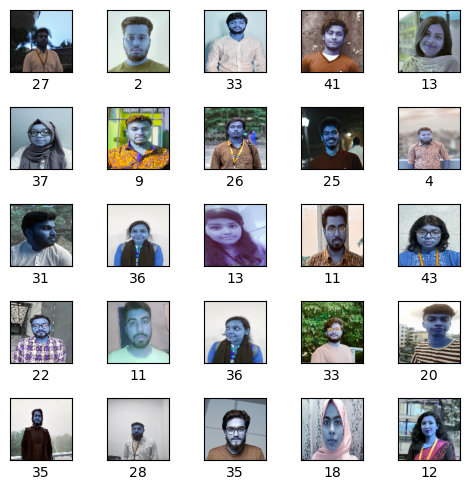

In [30]:
ROWS = 5
COLS = 5
i = 0

plt.figure(figsize=(5,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train[i].astype('uint8'))

        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train[i])
        i += 1
plt.tight_layout()
plt.show()

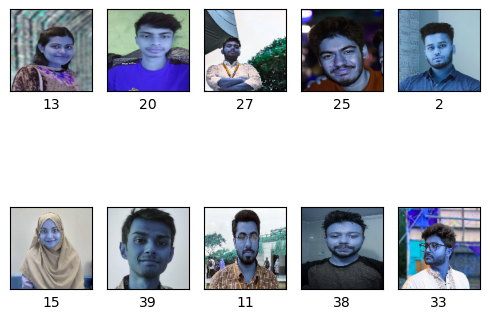

In [31]:
ROWS = 2
COLS = 5
i = 0

plt.figure(figsize=(5,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_val[i].astype('uint8'))

        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_val[i])
        i += 1
plt.tight_layout()
plt.show()

In [33]:
model = keras.Sequential([
    keras.Input(shape=(128,128,3)),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(44, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)      

In [34]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
h = model.fit(x=X_train, y=Y_train, epochs=15, validation_split=0.2, batch_size=16)

Epoch 1/15
14/14 [==============================] - 8s 93ms/step - loss: 24.5236 - accuracy: 0.0231 - val_loss: 3.6937 - val_accuracy: 0.0370
Epoch 2/15
14/14 [==============================] - 0s 18ms/step - loss: 3.7010 - accuracy: 0.0602 - val_loss: 3.6252 - val_accuracy: 0.1111
Epoch 3/15
14/14 [==============================] - 0s 19ms/step - loss: 3.3502 - accuracy: 0.1759 - val_loss: 3.6021 - val_accuracy: 0.1296
Epoch 4/15
14/14 [==============================] - 0s 19ms/step - loss: 2.6733 - accuracy: 0.3611 - val_loss: 4.6528 - val_accuracy: 0.1481
Epoch 5/15
14/14 [==============================] - 0s 18ms/step - loss: 1.8432 - accuracy: 0.5694 - val_loss: 4.4642 - val_accuracy: 0.2222
Epoch 6/15
14/14 [==============================] - 0s 17ms/step - loss: 1.0613 - accuracy: 0.7037 - val_loss: 5.3984 - val_accuracy: 0.2037
Epoch 7/15
14/14 [==============================] - 0s 21ms/step - loss: 0.5239 - accuracy: 0.8704 - val_loss: 6.3485 - val_accuracy: 0.2222
Epoch 8/15
1

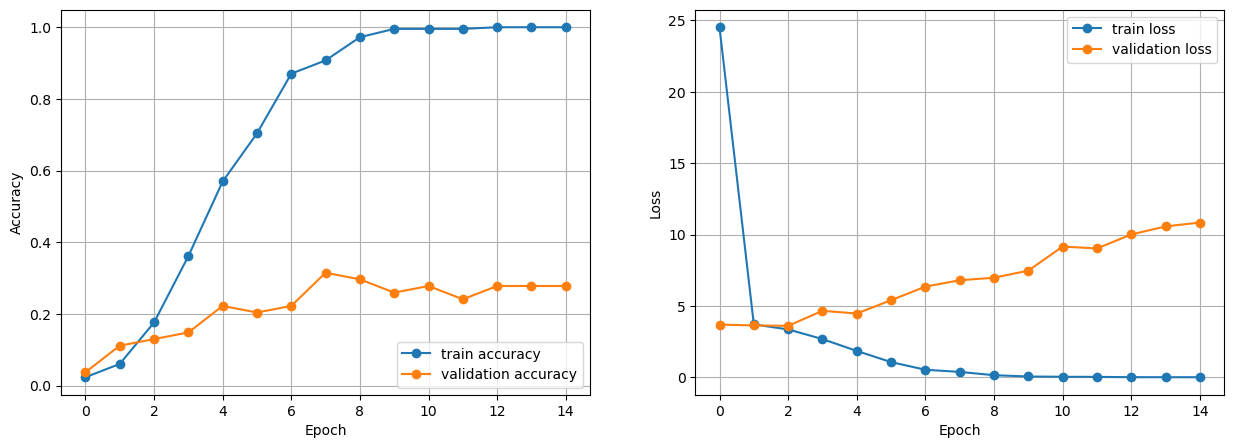

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [42]:
test_loss, test_acc = model.evaluate(X_val, Y_val)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

3/3 [==============================] - 0s 37ms/step - loss: 10.6478 - accuracy: 0.2667

Test Accuracy: 0.2666666805744171

Test Loss: 10.647798538208008


In [43]:

predictions = model.predict(X_val)


3/3 [==============================] - 0s 114ms/step


In [44]:

predictions[0]

array([1.5247933e-11, 3.0956397e-11, 7.4168611e-01, 7.1114812e-08,
       8.9168344e-03, 3.4025862e-04, 7.3161723e-06, 6.2434350e-15,
       9.0905983e-10, 8.0089817e-11, 2.0076649e-01, 3.8811045e-08,
       1.0431146e-03, 4.3584639e-03, 4.3992077e-09, 1.1845598e-08,
       2.9021514e-06, 3.7100570e-08, 2.6332794e-04, 1.2071702e-06,
       8.5195842e-07, 7.9487177e-07, 9.7332577e-06, 7.8149289e-03,
       1.1945259e-06, 1.4723856e-05, 7.0875459e-03, 1.6059725e-03,
       1.0617931e-06, 2.5976996e-07, 2.4846536e-03, 1.0293246e-03,
       3.3897406e-06, 2.7078757e-09, 5.5036850e-05, 8.0476253e-05,
       6.0170450e-08, 9.0328243e-04, 3.9160634e-05, 4.9900525e-04,
       3.0856805e-05, 3.2599475e-03, 1.7691636e-02, 4.6030197e-09],
      dtype=float32)

In [45]:

np.argmax(predictions[0])

2

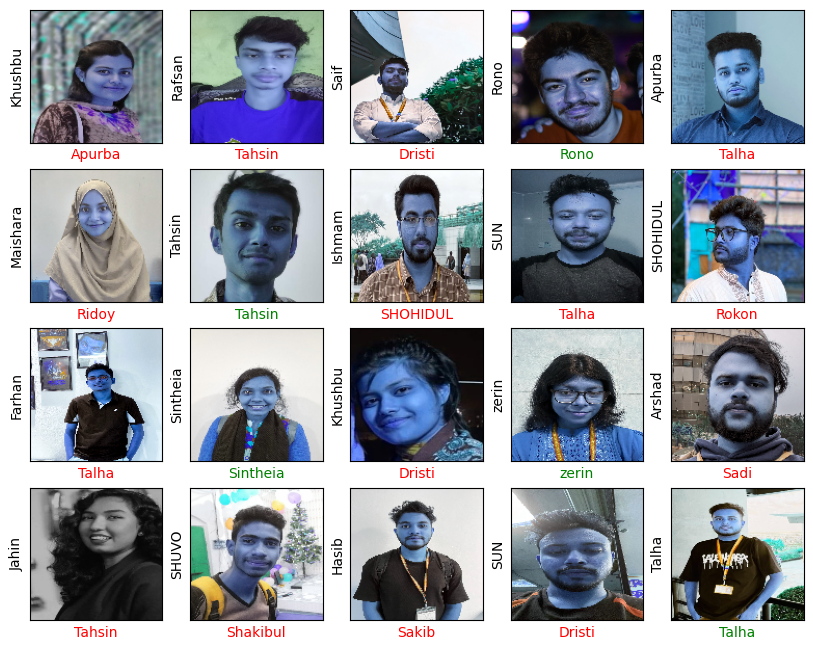

In [46]:
rows = 5
cols = 5

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(rows, cols, i+1)
    plt.imshow(X_val[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_val[i]])
    if Y_val[i] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')

plt.show()

In [47]:
model.save('face_recognization.h5')